In [253]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [233]:
data = pd.read_csv('d:/data/new_data/Dataset/Dataset/data2/stud.csv')
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


As our data contains both numeric and categorical columns, we will have to format the data and consider only the numeric values.

In [234]:
# List of all columns with numarical data
data_num_cols = [cols for cols in data.columns if data[cols].dtype !='O']

Here, the easiest method to find outliers is visualization methods and one of these methods is box plot. 
- In descriptive statistics, a box plot is a method for graphically depicting groups of numerical data through their quartiles.

In [235]:
data_num = data[data_num_cols]
data_num

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [236]:
data_num.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Detect outliers

Here, I have done multi-variant (more that one variable) outlier analysis. In statistics, an outlier is an observation point that is distant from other observations.

Text(0.5, 1.0, 'Box plot for different columns')

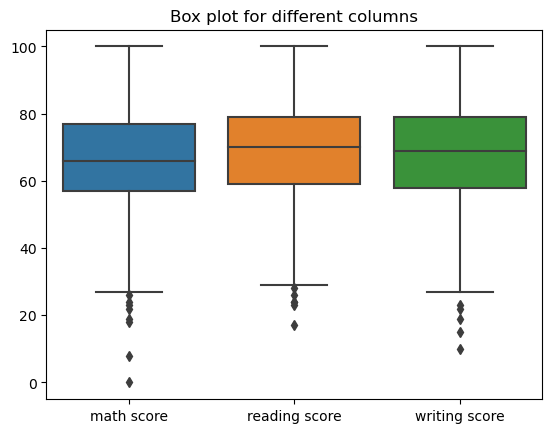

In [237]:
sns.boxplot(data_num)
plt.title('Box plot for different columns')

As can be seen in plot above, all three columns has outliers below the lower limit of box plot. Outliers are plotted as individual points.

## Remove outliers

### IQR Score:
- The interquartile range (IQR), which is also called the midspread or middle 50%, is a measure of statistical dispersion. IQR is equal to the difference between 75th and 25th percentiles of the data, or between upper and lower quartiles i.e IQR = Q3 − Q1

In [238]:
data_num.shape

(1000, 3)

In [239]:
def outlier_list(data,column):
    """Remove outliers from the selected column and store in place of old column.

    Args:
        data (dataframe): Dataframe with outliers.
        column (string): Column name with outliers in data.

    Returns:
        DataFrame: Data with removed outliers.
    """
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - (1.5*IQR)
    upper_limit = Q3 + (1.5*IQR)
    outlier_list = data.index[(data[column] < lower_limit)|(data[column] > upper_limit)]

    return outlier_list

In [240]:
index_list = []
for col in data_num.columns:
    index_list.extend(outlier_list(data_num,col))

index_list = sorted(set(index_list))
cleaned_data = data_num.drop(index_list)

In [241]:
cleaned_data.shape

(988, 3)

In [242]:
cleaned_data.to_csv('cleaned_data.csv')

### Z-score:
- Z score/standard score is an important concept in statistics. More specifically, Z score tells how many standard deviations away a data point is from the mean.
- Z score = (x -mean) / std. deviation

In [268]:
data_num.shape

(1000, 3)

In [269]:
def z_score(data,column):
    z = np.abs(stats.zscore(data_num[column]))

    threshold = 3
    outsider_lst = []
    outsider_lst = (np.where(z > threshold))[0].tolist()

    return outsider_lst

In [270]:
index_lst = []
for cols in data_num.columns:
    index_lst.extend(z_score(data_num,cols))

index_lst = sorted(set(index_lst))
clean_data = data_num.drop(index_lst)

In [272]:
clean_data.shape

(993, 3)

In [273]:
clean_data.to_csv('clean_data.csv')